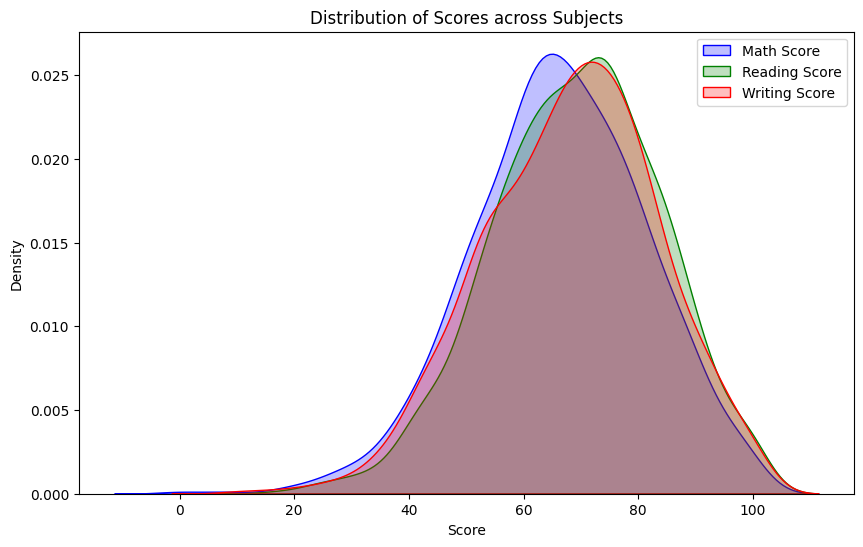

<ipython-input-7-2496e15f89bb>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["parental_level_of_education"], y=df_cleaned["average_score"], palette="coolwarm")


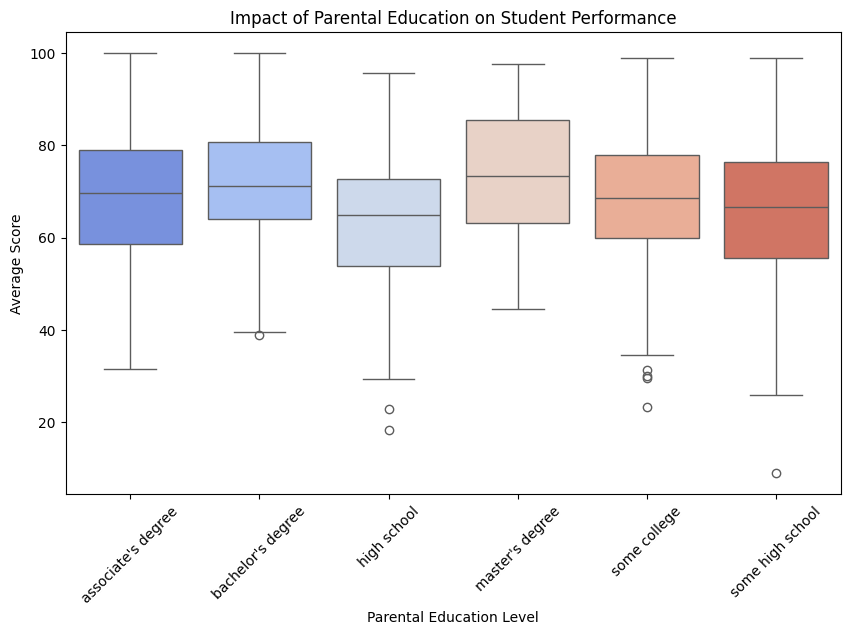

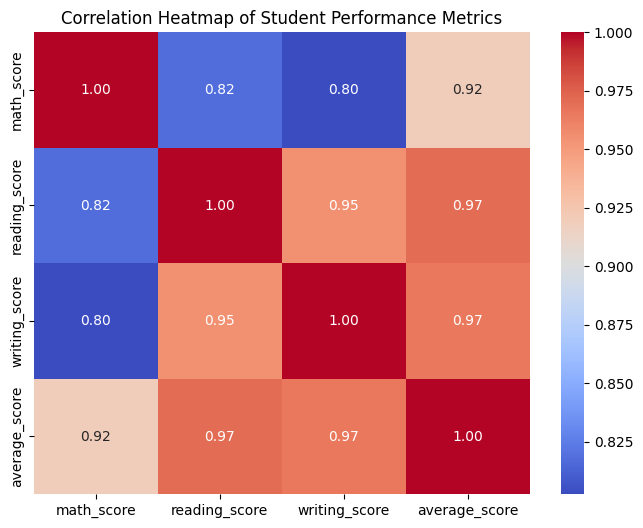

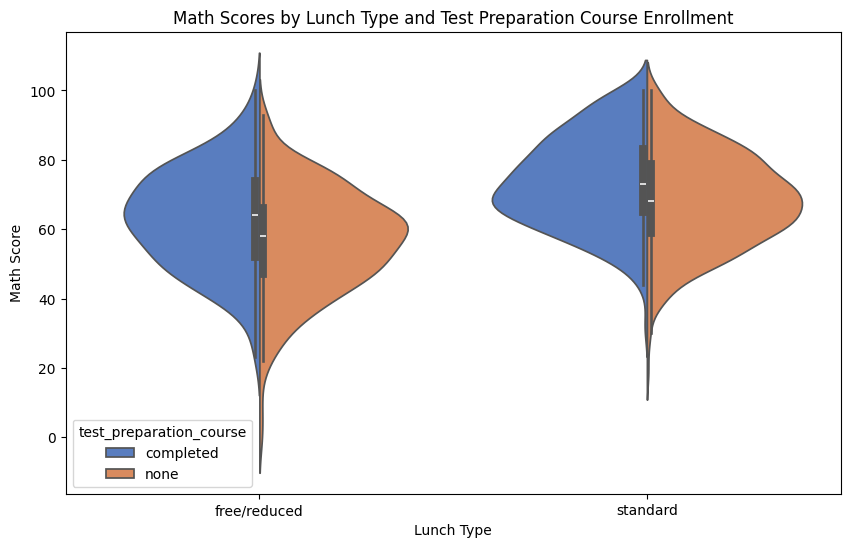

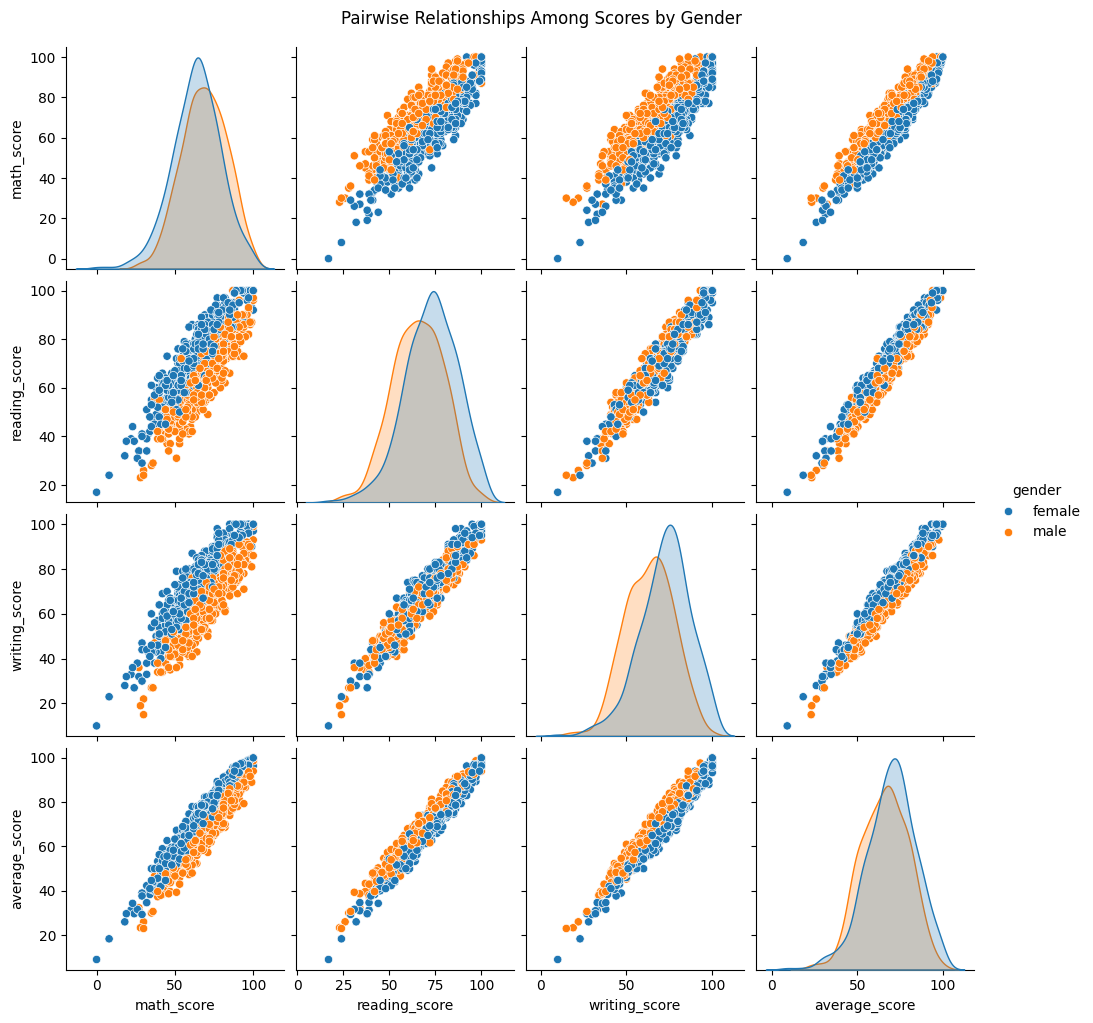

'/mnt/data/cleaned_students_performance.csv'

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Step 1: Data Cleaning and Preprocessing
## Standardize column names (remove spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

## Remove null values
df_cleaned = df.dropna()

## Convert categorical columns to categorical data type for better analysis
categorical_cols = ["gender", "race/ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype("category")

## Create a new feature: Average Score
df_cleaned["average_score"] = df_cleaned[["math_score", "reading_score", "writing_score"]].mean(axis=1)

# Save the cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_students_performance.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

# Step 2: Enhanced Visualizations

# Visualization 1: Distribution of Scores (Math, Reading, Writing) using KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned["math_score"], label="Math Score", fill=True, color="blue")
sns.kdeplot(df_cleaned["reading_score"], label="Reading Score", fill=True, color="green")
sns.kdeplot(df_cleaned["writing_score"], label="Writing Score", fill=True, color="red")
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Distribution of Scores across Subjects")
plt.legend()
plt.show()

# Visualization 2: Boxplot of Average Score by Parental Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned["parental_level_of_education"], y=df_cleaned["average_score"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Parental Education Level")
plt.ylabel("Average Score")
plt.title("Impact of Parental Education on Student Performance")
plt.show()

# Visualization 3: Heatmap of Correlation between Scores
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[["math_score", "reading_score", "writing_score", "average_score"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Metrics")
plt.show()

# Visualization 4: Violin Plot of Math Scores by Lunch Type and Test Preparation Course
plt.figure(figsize=(10,6))
sns.violinplot(x="lunch", y="math_score", hue="test_preparation_course", data=df_cleaned, split=True, palette="muted")
plt.xlabel("Lunch Type")
plt.ylabel("Math Score")
plt.title("Math Scores by Lunch Type and Test Preparation Course Enrollment")
plt.show()

# Visualization 5: Pairplot to Show Relationships Among Scores by Gender
sns.pairplot(df_cleaned, hue="gender", vars=["math_score", "reading_score", "writing_score", "average_score"], diag_kind="kde")
plt.suptitle("Pairwise Relationships Among Scores by Gender", y=1.02)
plt.show()

# Provide the cleaned dataset file for download
cleaned_file_path
